In [11]:
import pandas
from pandas.plotting import scatter_matrix
import numpy
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [12]:
#input
names =['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
datas = pandas.read_csv('adult.data', names=names)
datas.head()
#print (datas.shape)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#data describe
def desc_data(data):
    for column in data.columns:
        print (column)
        if data.dtypes[column] == numpy.object: # Categorical data
            print( data[column].value_counts())
        else:
            print (data[column].describe()) 
            
        print ('\n')
    
desc_data(datas)

age
count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


fnlwgt
count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctor

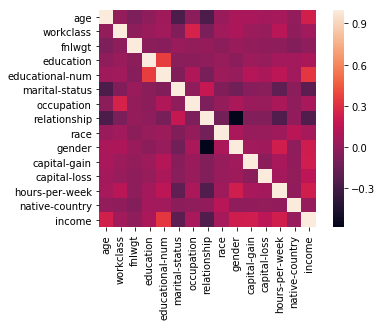

In [14]:
#correlation
def number_encode_features(data):
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == numpy.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(datas)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()


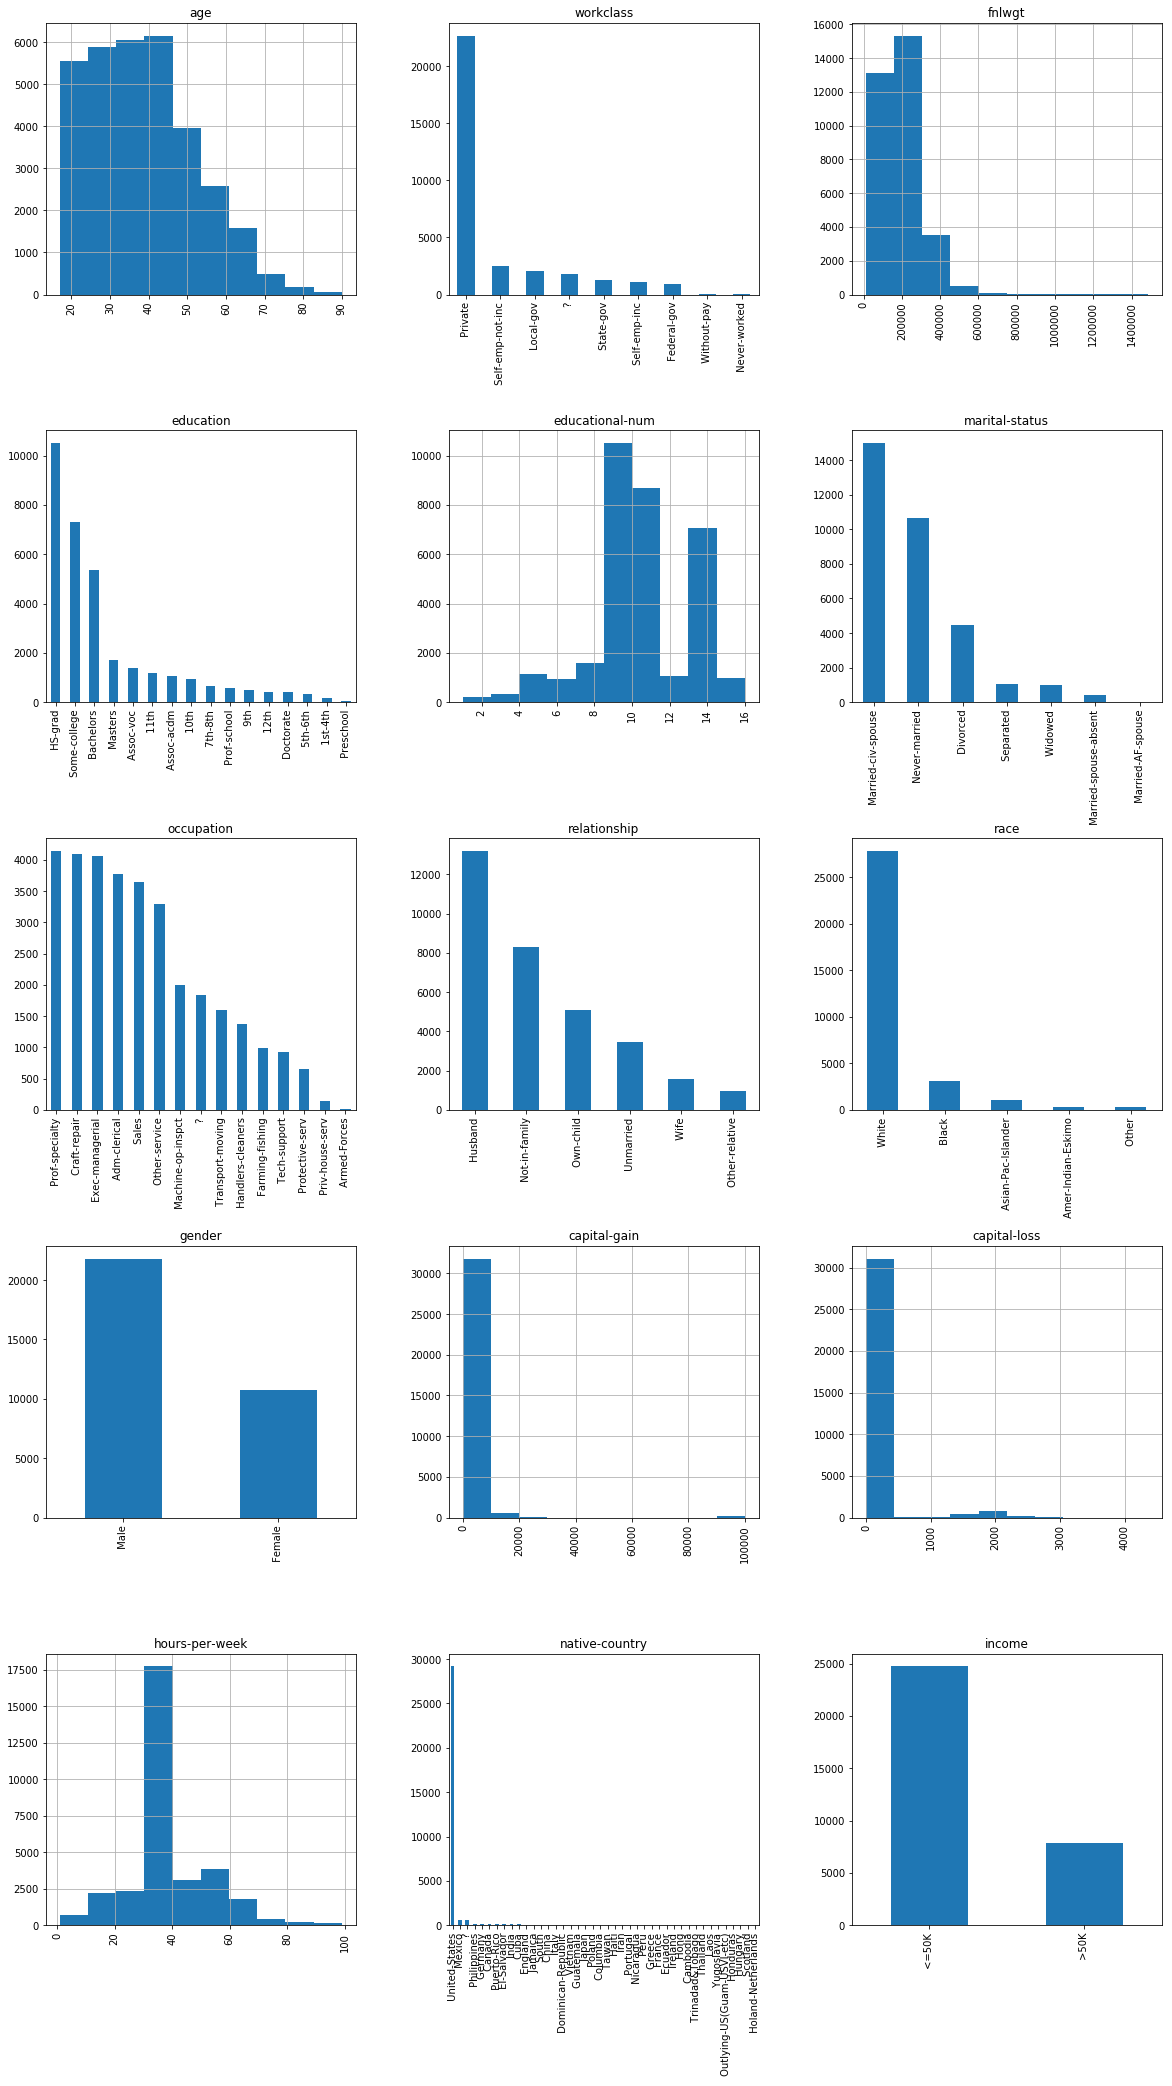

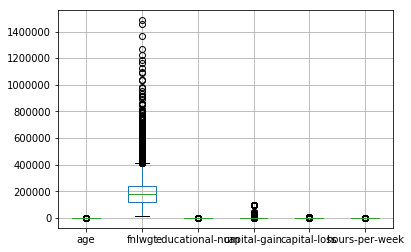

In [16]:
#histogram
def make_histogram(data):
 fig = plt.figure(figsize=(20,35))
 COL = 3
 ROW = math.ceil(float(data.shape[1]/COL))

 for i, column in enumerate (data.columns):
  ax = fig.add_subplot(ROW, COL, i+1)
  ax.set_title(column)
  if data.dtypes[column] == numpy.object:
   data[column].value_counts().plot(kind="bar", axes = ax)
  else:
   data[column].hist(axes=ax)
   plt.xticks(rotation="vertical")
 plt.subplots_adjust(hspace=0.5, wspace=0.3)
make_histogram(datas)
plt.show()

#boxplot
datas.boxplot()
plt.show()
    


In [17]:
#imputer
imp_modus = SimpleImputer(missing_values = " ?" , strategy='most_frequent')
imp_modus.fit(datas)
data_modus = imp_modus.transform(datas)
data_imputed = pandas.DataFrame(data_modus, 
 columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data_imputed.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == numpy.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].fillna('0'))
    return result, encoders


In [43]:
encoded_data, _ = number_encode_features(datas)
encoded_data.head()
X_data = encoded_data.drop('income',axis=1)
X_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [44]:
target = encoded_data['income']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [56]:

import copy
from sklearn.decomposition import PCA

from sklearn import datasets
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
def calc(data,label):
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=.2, stratify=label, random_state=0)
    clf_DT = tree.DecisionTreeClassifier(random_state=0)
    clf_DT = clf_DT.fit(X_train, Y_train)

    hasil_testing_DT = clf_DT.predict(X_test)
    accuracy_DT = accuracy_score(Y_test, hasil_testing_DT)
    print(accuracy_DT)

    scores_DT = cross_val_score(clf_DT, data, label, cv=5)
    print(scores_DT)
    print(numpy.mean(scores_DT))

In [61]:
def convertTo2Dimension(data):
    pca = PCA(n_components=2)
    return pandas.DataFrame(pca.fit_transform(data))

def generateListColor(data):
    color = []
    for single in data:
        if single == '0':
            color.append(0.6)
        else:
            color.append(0.3)
    return color

def printCount(name,data,target):
    print (data)
    print(name)
    print (target)
    print (data.shape)
    print (numpy.count_nonzero(target=='nan'))
    print (numpy.count_nonzero(target=='1'))
    calc(data,target)
    print ('\n')

       age  workclass  fnlwgt  education  educational-num  marital-status  \
0       39          7   77516          9               13               4   
1       50          6   83311          9               13               2   
2       38          4  215646         11                9               0   
3       53          4  234721          1                7               2   
4       28          4  338409          9               13               2   
5       37          4  284582         12               14               2   
6       49          4  160187          6                5               3   
7       52          6  209642         11                9               2   
8       31          4   45781         12               14               4   
9       42          4  159449          9               13               2   
10      37          4  280464         15               10               2   
11      30          7  141297          9               13               2   

c:\python37\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0.8000921234454169
[0.80807616 0.80282555 0.80497543 0.8125     0.80727887]
0.8071312015922795


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    45      5  31067 ...   1902     43     39]
 [    41      4 175353 ...      0     40     39]
 [    37      4 682916 ...      0     54     39]]
SMOTE
[0 0 0 ... 1 1 1]
(49440, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8548745954692557
[0.75222492 0.81644417 0.89229369 0.88713592 0.88663026]
0.8469457928802588


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    50      4 321831 ...      0     67     39]
 [    40      4 154374 ...      0     40     39]
 [    37      4 154388 ...      0     44     39]]
ADASYN
[0 0 0 ... 1 1 1]
(49543, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8536683822787365
[0.7405389  0.8119891  0.88142093 0.88696003 0.87878482]
0.8399387575911323


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    45      5  31067 ...   1902     43     39]
 [    41      4 175353 ...      0     40     39]
 [    37      4 682916 ...      0     54     39]]
BorderlineSMOTE
[0 0 0 ... 1 1 1]
(49440, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8548745954692557
[0.75222492 0.81644417 0.89229369 0.88713592 0.88663026]
0.8469457928802588


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    45      5  31067 ...   1902     43     39]
 [    41      4 175353 ...      0     40     39]
 [    37      4 682916 ...      0     54     39]]
SMOTE + TOMEK Links
[0 0 0 ... 1 1 1]
(47209, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8647532302478288
[0.7635035  0.83054438 0.89885617 0.8936666  0.89524415]
0.8563629579357735


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    50      4 321831 ...      0     67     39]
 [    40      4 154374 ...      0     40     39]
 [    37      4 154388 ...      0     44     39]]
ADASYN + TOMEK Links
[0 0 0 ... 1 1 1]
(47331, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8546530051758741
[0.74046688 0.81766322 0.87840693 0.88326643 0.88147053]
0.8402547968120648


[[    39      7  77516 ...      0     40     39]
 [    50      6  83311 ...      0     13     39]
 [    38      4 215646 ...      0     40     39]
 ...
 [    45      5  31067 ...   1902     43     39]
 [    41      4 175353 ...      0     40     39]
 [    37      4 682916 ...      0     54     39]]
BorderlineSMOTE + TOMEK Links
[0 0 0 ... 1 1 1]
(47209, 14)
0
0


c:\python37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
c:\python37\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


0.8647532302478288
[0.7635035  0.83054438 0.89885617 0.8936666  0.89524415]
0.8563629579357735




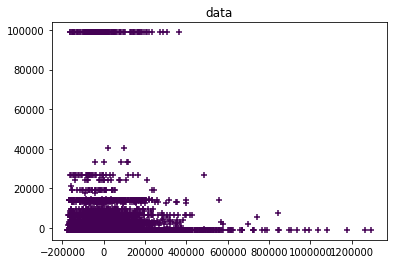

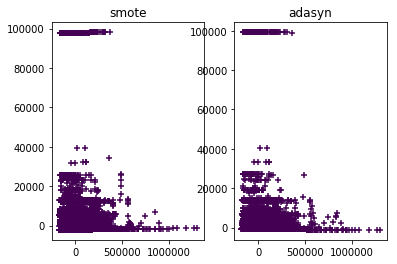

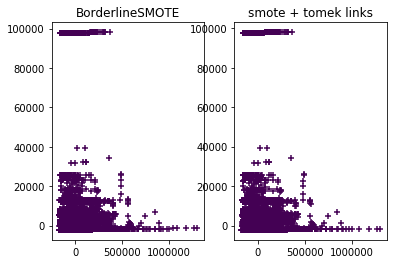

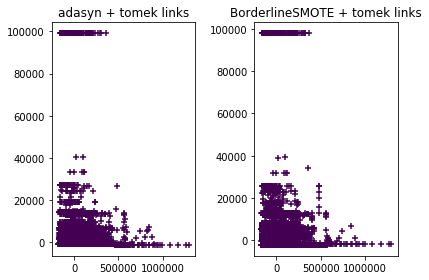

In [63]:
fig, (ax1) = plt.subplots(1, 1)
fig, (ax2, ax3) = plt.subplots(1, 2)
fig, (ax4, ax5) = plt.subplots(1, 2)
fig, (ax6, ax7) = plt.subplots(1, 2)

printCount('Original Data',X_data,target)
Y_pd = convertTo2Dimension(X_data);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(target)
ax1.scatter(x, y, c=color,marker='+');
ax1.set_title('data')

#Smote
sm = SMOTE(ratio = 'auto', random_state=0)
new_data_smote, new_target_smote = sm.fit_sample(X_data, target)
printCount('SMOTE',new_data_smote,new_target_smote)

Y_pd = convertTo2Dimension(new_data_smote);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote)
ax2.scatter(x, y, c=color,marker='+');
ax2.set_title('smote')

#adasyn
ada = ADASYN(ratio = 'auto', random_state=0)
new_data_adasyn, new_target_adasyn = ada.fit_sample(X_data, target)
printCount('ADASYN',new_data_adasyn,new_target_adasyn)

Y_pd = convertTo2Dimension(new_data_adasyn);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_adasyn)
ax3.scatter(x, y, c=color,marker='+');
ax3.set_title('adasyn')

#BorderlineSmote
blsm = BorderlineSMOTE(random_state=0)
new_data_blsmote, new_target_blsmote = sm.fit_sample(X_data, target)
printCount('BorderlineSMOTE',new_data_blsmote,new_target_blsmote)

Y_pd = convertTo2Dimension(new_data_smote);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote)
ax4.scatter(x, y, c=color,marker='+');
ax4.set_title('BorderlineSMOTE')

#Tomek Links
tl = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_smote_tomek, new_target_smote_tomek, idx_new = tl.fit_sample(new_data_smote,new_target_smote)
printCount('SMOTE + TOMEK Links',new_data_smote_tomek,new_target_smote_tomek)

Y_pd = convertTo2Dimension(new_data_smote_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_smote_tomek)
ax5.scatter(x, y, c=color,marker='+');
ax5.set_title('smote + tomek links')

t2 = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_adasyn_tomek, new_target_adasyn_tomek, idx_new = t2.fit_sample(new_data_adasyn,new_target_adasyn)
printCount('ADASYN + TOMEK Links',new_data_adasyn_tomek,new_target_adasyn_tomek)

Y_pd = convertTo2Dimension(new_data_adasyn_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_adasyn_tomek)
ax6.scatter(x, y, c=color,marker='+');
ax6.set_title('adasyn + tomek links')

t3 = TomekLinks(random_state = 0, ratio = 'not minority', return_indices=True)
new_data_blsmote_tomek, new_target_blsmote_tomek, idx_new = t3.fit_sample(new_data_blsmote,new_target_blsmote)
printCount('BorderlineSMOTE + TOMEK Links',new_data_blsmote_tomek,new_target_blsmote_tomek)

Y_pd = convertTo2Dimension(new_data_blsmote_tomek);
x,y = Y_pd[0], Y_pd[1];
color = generateListColor(new_target_blsmote_tomek)
ax7.scatter(x, y, c=color,marker='+');
ax7.set_title('BorderlineSMOTE + tomek links')

fig.tight_layout()
plt.show()